# Party Affiliation Prediction

![](img/Congress.jpg)

### Objective
Predict their party affiliation ('Democrat' or 'Republican') based on how they voted on certain key issues.
* KNN Classification
* Assess model performance using confusion matrix.
* Logistic Regression
* Assess model performance with ROC and AUC


### Dataset
* Congressional Voting Records
* Consists of votes made by US House of Representatives Congressmen. 

Source: [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)

In [53]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Set plotting style
plt.style.use('ggplot')

In [2]:
# Load dataset

First we perform exploratory data analysis (EDA) to understand the structure of the data. 

In [3]:
Column_names = ['party',
                'handicapped-infants', 
                'water-project-cost-sharing', 
                'adoption-of-the-budget-resolution', 
                'physician-fee-freeze',
                'el-salvador-aid',
                'religious-groups-in-schools',
                'anti-satellite-test-ban',
                'aid-to-nicaraguan-contras',
                'mx-missile',
                'immigration',
                'synfuels-corporation-cutback',
                'education-spending',
                'superfund-right-to-sue',
                'crime',
                'duty-free-exports',
                'export-administration-act-south-africa']
df = pd.read_csv('house-votes-84.data.txt', index_col=False, names=Column_names)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
party                                     435 non-null object
handicapped-infants                       435 non-null object
water-project-cost-sharing                435 non-null object
adoption-of-the-budget-resolution         435 non-null object
physician-fee-freeze                      435 non-null object
el-salvador-aid                           435 non-null object
religious-groups-in-schools               435 non-null object
anti-satellite-test-ban                   435 non-null object
aid-to-nicaraguan-contras                 435 non-null object
mx-missile                                435 non-null object
immigration                               435 non-null object
synfuels-corporation-cutback              435 non-null object
education-spending                        435 non-null object
superfund-right-to-sue                    435 non-null object
crime                      

In [5]:
# Cleaning
# Convert vote to boolean integers and assume ? to be a no
for c in df.columns[1::]:
    df[c] = df[c].map({'n': 0, 'y': 1, '?': 1})

In [6]:
df.head()

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,0,1,0,1,1,1,0,0,0,1,1,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
2,democrat,1,1,1,1,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,1,1,1,1,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
party                                     435 non-null object
handicapped-infants                       435 non-null int64
water-project-cost-sharing                435 non-null int64
adoption-of-the-budget-resolution         435 non-null int64
physician-fee-freeze                      435 non-null int64
el-salvador-aid                           435 non-null int64
religious-groups-in-schools               435 non-null int64
anti-satellite-test-ban                   435 non-null int64
aid-to-nicaraguan-contras                 435 non-null int64
mx-missile                                435 non-null int64
immigration                               435 non-null int64
synfuels-corporation-cutback              435 non-null int64
education-spending                        435 non-null int64
superfund-right-to-sue                    435 non-null int64
crime                                   

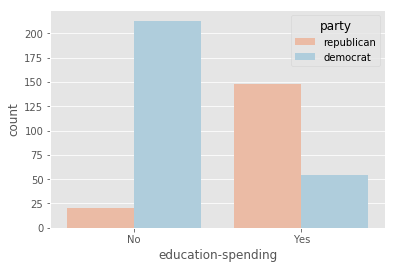

In [8]:
# Let's take a look at the difference between the 2 parties on the education bill
plt.figure()
sns.countplot(x='education-spending', hue='party', data=df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

It seems like Democrats voted resoundingly against this bill, compared to Republicans. This is the kind of information that our machine learning model will seek to learn when we try to predict party affiliation solely based on voting behavior. An expert in U.S politics may be able to predict this without machine learning, but probably not instantaneously - and certainly not if we are dealing with hundreds of samples!

## Fitting a KNN classifier

The data must adhere to the format required by the scikit-learn API. 
* The features need to be in an array where each column is a feature and each row a different observation or data point - in this case, a Congressman's voting record. 
* The target needs to be a single column with the same number of observations as the feature data. 

In [9]:
# Create arrays for the features and the response variable
y = df['party'].values
x = df.drop('party', axis=1).values

Note the use of .drop() to drop the target variable 'party' from the feature array X as well as the use of the .values attribute to ensure x and y are NumPy arrays. 
Without using .values, x and y are a DataFrame and Series respectively; the scikit-learn API will accept them in this form also as long as they are of the right shape.

In [10]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(x, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')

In [11]:
x_new = np.array([[0,
                  0,
                  1,
                  0,
                  0,
                  0,
                  1,
                  1,
                  1,
                  0,
                  1,
                  0,
                  0,
                  0,
                  1,
                  1]])
               
x_new

array([[0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1]])

In [12]:
prediction = knn.predict(x_new)
print('This person is predicted to be a {}'.format(prediction))

This person is predicted to be a ['democrat']


In [13]:
# Splitting into training and testing data
X_train, X_test, y_train, y_test = train_test_split(x,y, 
                                                    test_size=0.3,
                                                    random_state=21,
                                                    stratify=y)

In [14]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=8, p=2,
           weights='uniform')

In [15]:
y_pred = knn.predict(X_test)

In [16]:
# Use score method of model to check accuracy
print('The accuracy of our k-nearest neighbor model is about {}'.format(knn.score(X_test, y_test)))

The accuracy of our k-nearest neighbor model is about 0.9465648854961832


In [17]:
print(confusion_matrix(y_test, y_pred))

[[75  5]
 [ 2 49]]


In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    democrat       0.97      0.94      0.96        80
  republican       0.91      0.96      0.93        51

   micro avg       0.95      0.95      0.95       131
   macro avg       0.94      0.95      0.94       131
weighted avg       0.95      0.95      0.95       131



## Logistic Regression

In [19]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [20]:
y_pred = logreg.predict(X_test)

Using predicted probabilities of the model assigning 1 to the observation in question. To compute the ROC, we do not merely want the predictions on the test set. We want the probability that our log reg model ouputs before using a threshold to predict the label

In [47]:
# Returns array with 2 columns: probablities for the respective target values
# Take 2nd column: probability that the predicted label is 1
y_pred_prob = logreg.predict_proba(X_test)[:,1]

In [29]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label='republican')

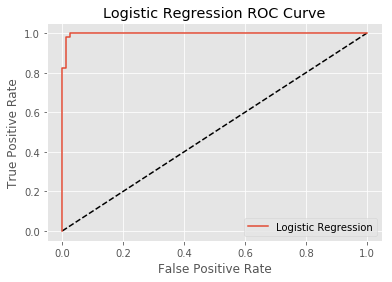

In [40]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [51]:
# Area under ROC
roc_auc_score(y_test, y_pred_prob)

0.9975490196078431

In [55]:
# AUC using cross-validation
cv_scores = cross_val_score(logreg, x, y, cv=5, scoring='roc_auc')

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

In [56]:
print(cv_scores)

[0.99591503 0.99618736 0.99694784 0.99942824 0.96769583]


In [57]:
# Quick look at confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[78  2]
 [ 0 51]]
              precision    recall  f1-score   support

    democrat       1.00      0.97      0.99        80
  republican       0.96      1.00      0.98        51

   micro avg       0.98      0.98      0.98       131
   macro avg       0.98      0.99      0.98       131
weighted avg       0.99      0.98      0.98       131



It looks like the logistical regression model has the better performance.